Caricamento e plot della feature 'crest_factor' in corso...


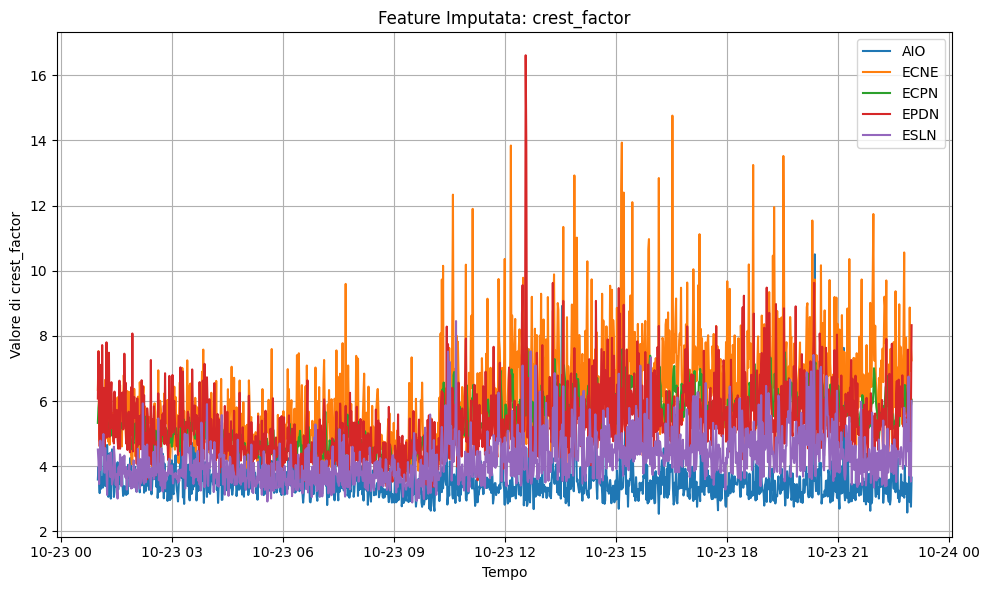

Caricamento e plot della feature 'energy' in corso...


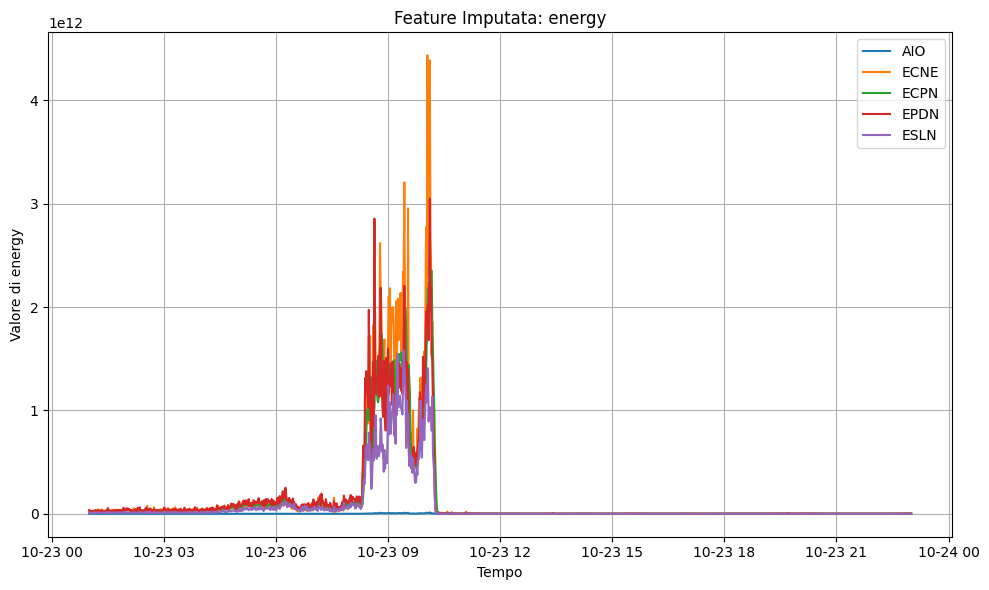

Caricamento e plot della feature 'horizontal_to_vertical_ratio' in corso...


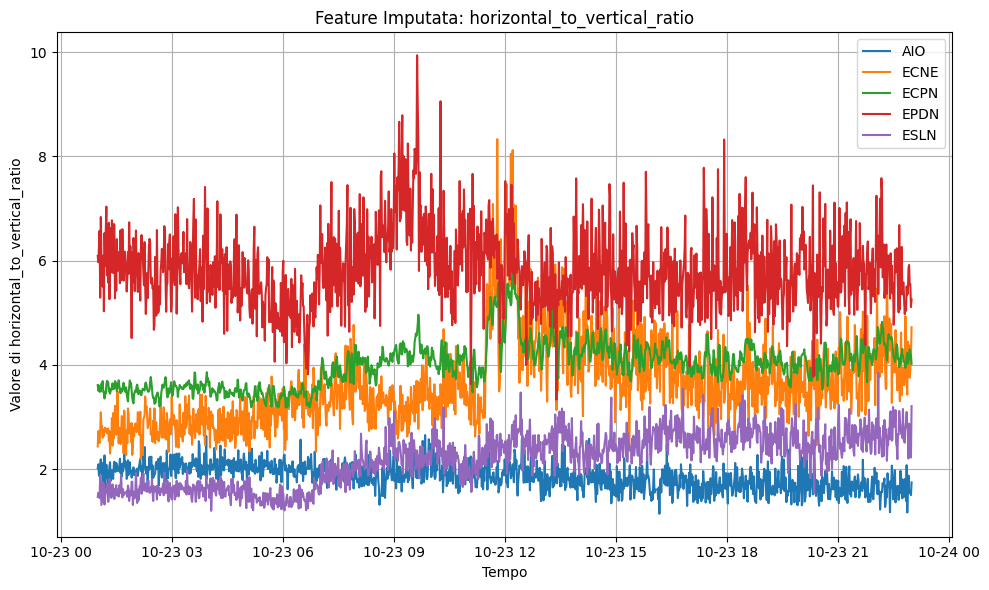

Caricamento e plot della feature 'max_amplitude' in corso...


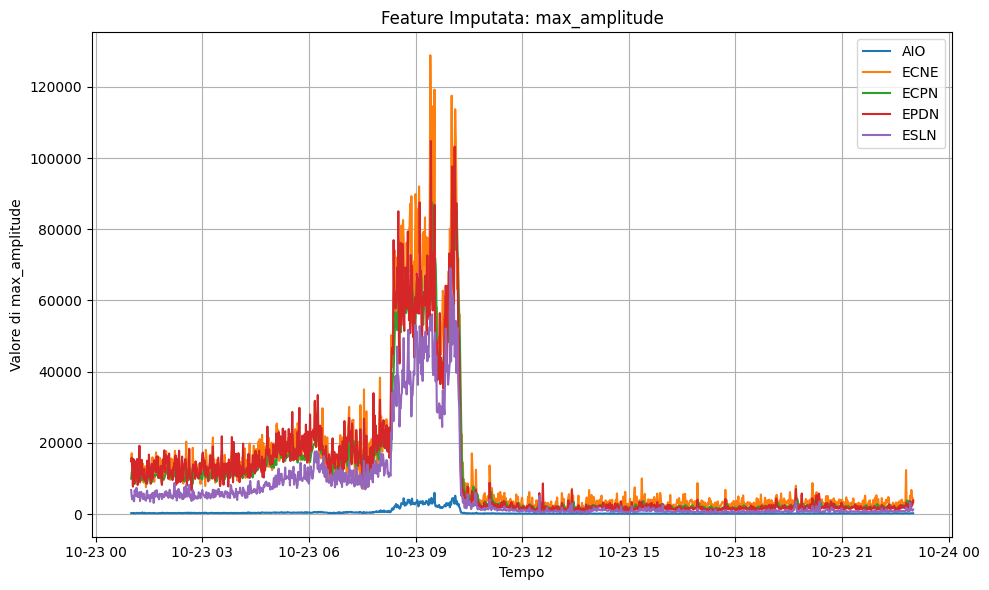

Caricamento e plot della feature 'motion_direction' in corso...


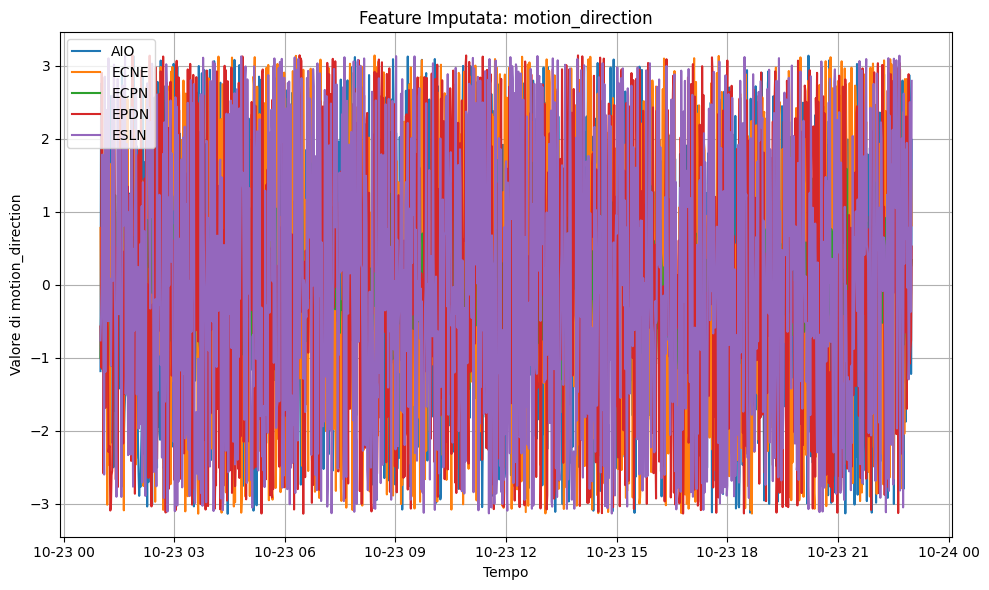

Caricamento e plot della feature 'peak_count' in corso...


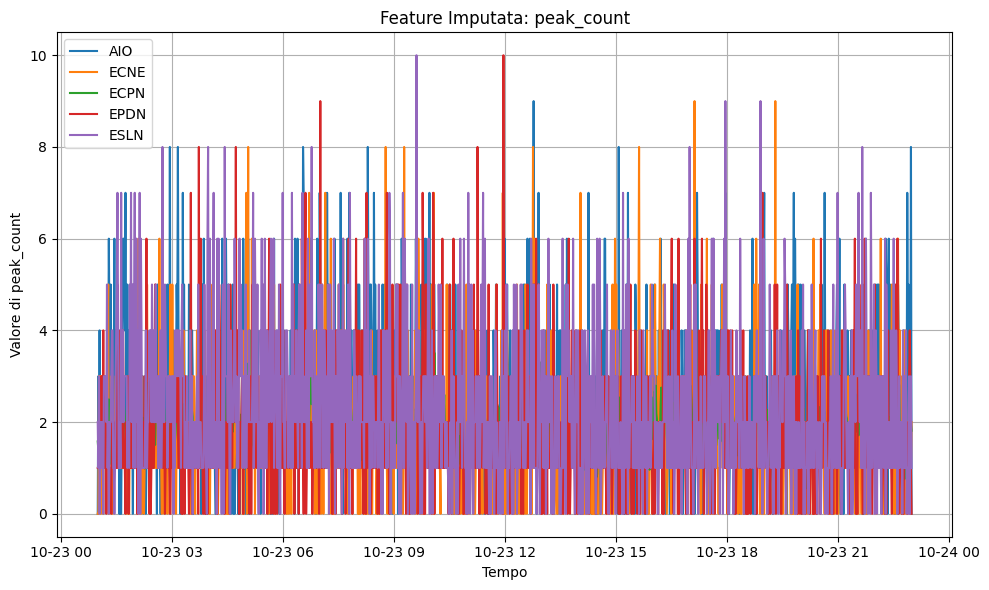

Caricamento e plot della feature 'rms' in corso...


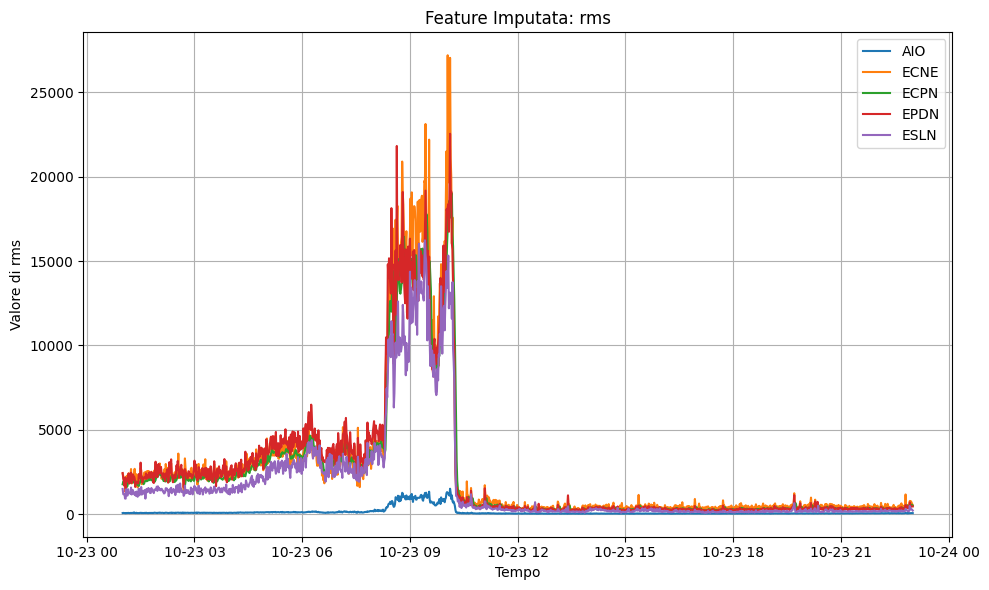

Caricamento e plot della feature 'rolling_snr' in corso...


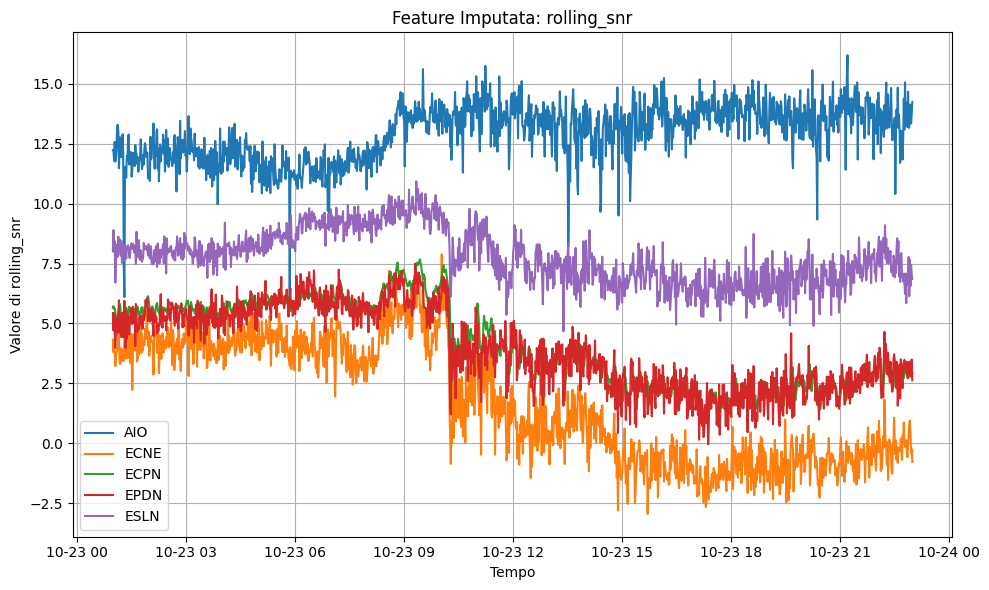

Caricamento e plot della feature 'spectral_entropy' in corso...


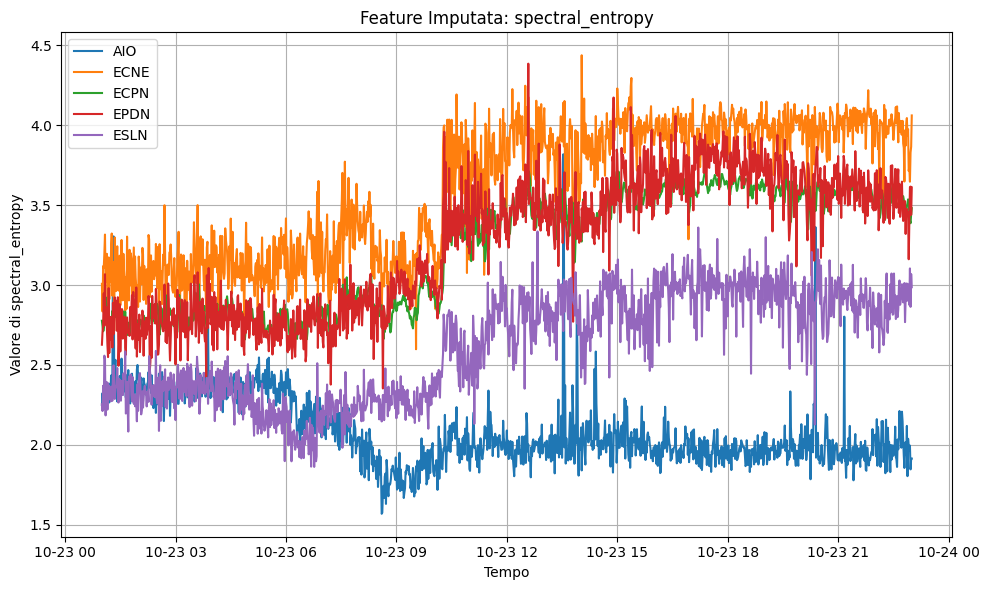

Caricamento e plot della feature 'statistics_kurtosis' in corso...


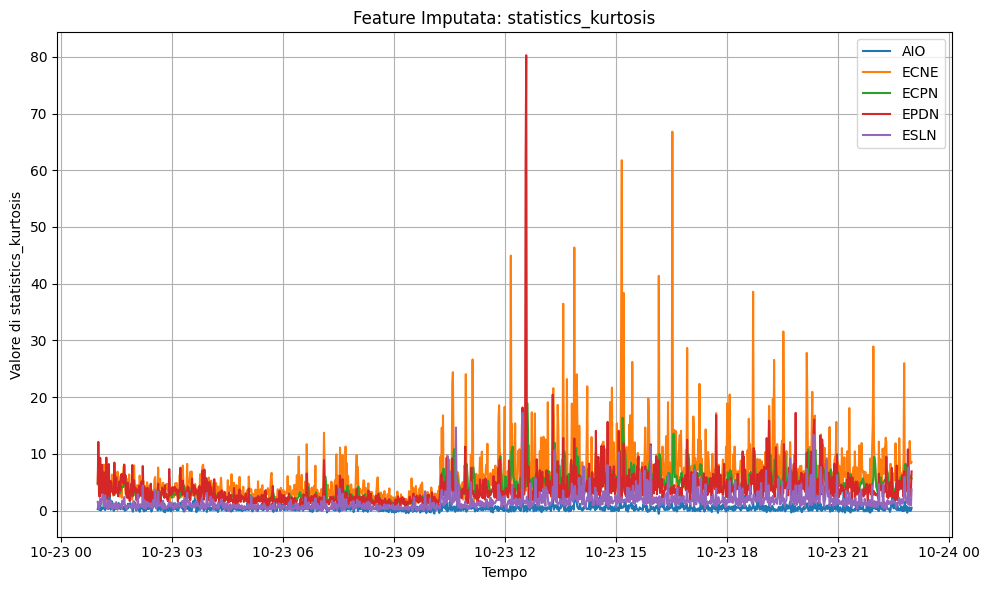

Caricamento e plot della feature 'statistics_skewness' in corso...


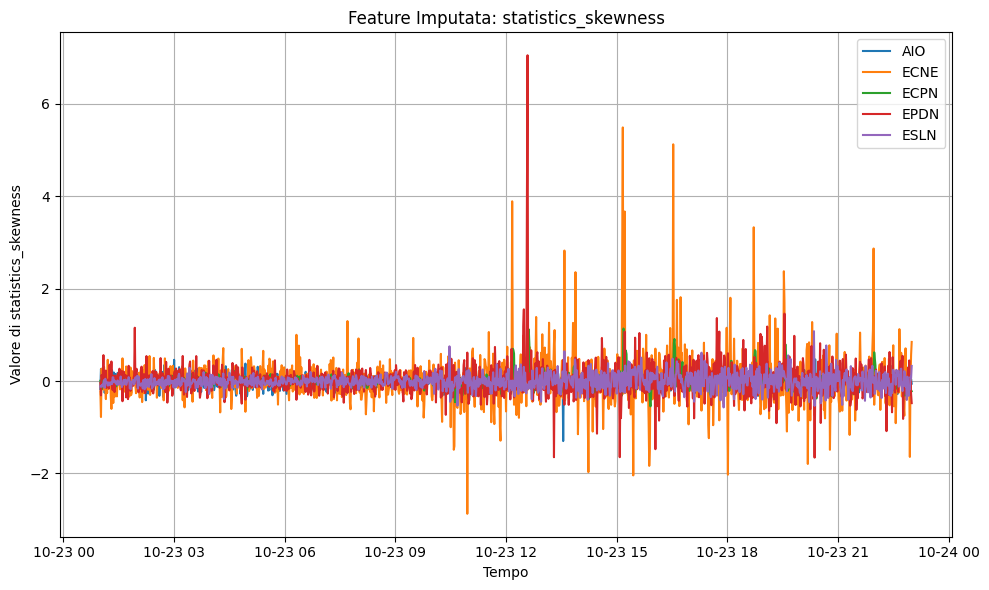

Caricamento e plot della feature 'statistics_std_dev' in corso...


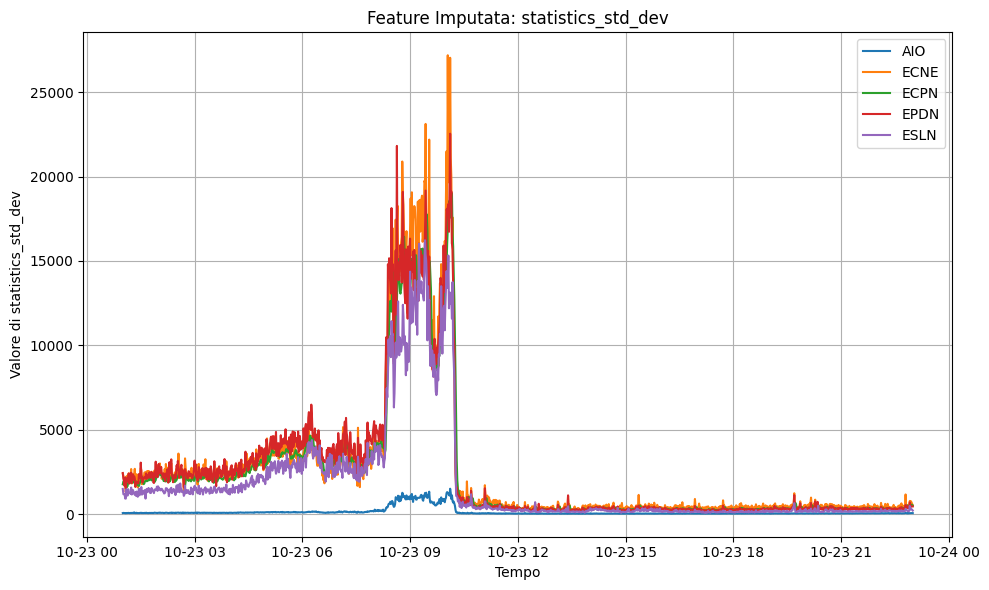

Caricamento e plot della feature 'statistics_variance' in corso...


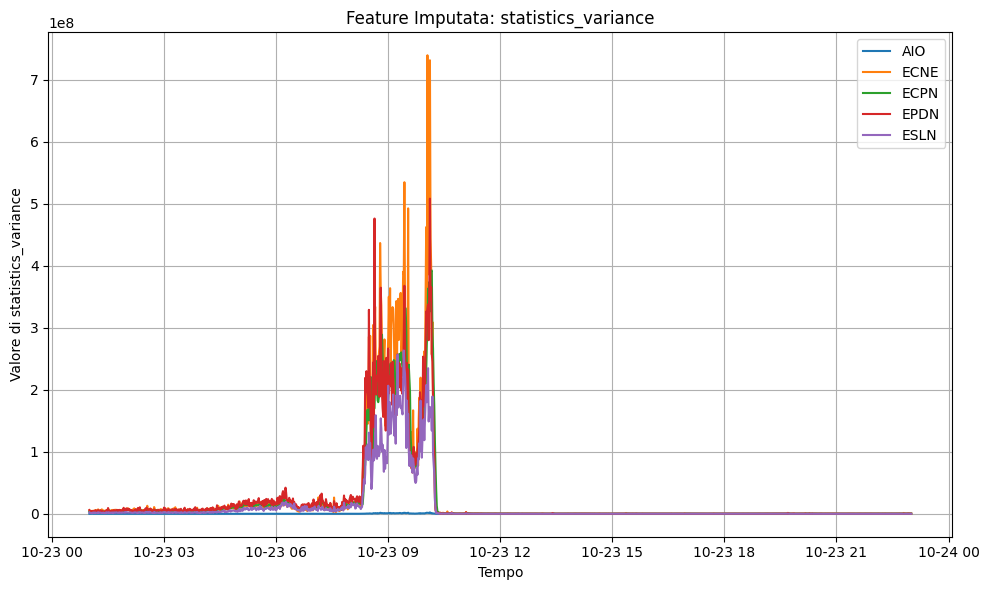

In [12]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import os

# Coordinate delle stazioni reali (latitudine, longitudine)
station_dirs = {
    'AIO': 'data/final/SEISMIC_final/AIO_final',
    'ECNE': 'data/final/SEISMIC_final/ECNE_final',
    'ECPN': 'data/final/SEISMIC_final/ECPN_final',
    'EPDN': 'data/final/SEISMIC_final/EPDN_final',
    'ESLN': 'data/final/SEISMIC_final/ESLN_final'
}

# Lista delle feature da elaborare
features = ['crest_factor', 'energy', 'horizontal_to_vertical_ratio', 'max_amplitude', 'motion_direction',
            'peak_count', 'rms', 'rolling_snr', 'spectral_entropy',
            'statistics_kurtosis', 'statistics_skewness', 'statistics_std_dev', 'statistics_variance']

# Funzione per caricare i dati imputati
def load_imputed_feature_data(feature_name, station_dirs):
    feature_data = {}
    for station, station_dir in station_dirs.items():
        feature_file = os.path.join(station_dir, f'{feature_name}_imputed.pkl')
        with open(feature_file, 'rb') as f:
            data = pickle.load(f)
            feature_data[station] = data
    return feature_data

# Funzione per plottare i dati in un arco temporale specifico
def plot_imputed_features(features, station_dirs, start_time=None, end_time=None):
    for feature in features:
        print(f"Caricamento e plot della feature '{feature}' in corso...")
        feature_data = load_imputed_feature_data(feature, station_dirs)
        plt.figure(figsize=(10, 6))

        for station, data in feature_data.items():
            if start_time and end_time:
                data = data[(data.index >= start_time) & (data.index <= end_time)]
            plt.plot(data.index, data.values, label=station)

        plt.title(f"Feature Imputata: {feature}")
        plt.xlabel("Tempo")
        plt.ylabel(f"Valore di {feature}")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Plottaggio dei dati imputati in un arco temporale specificato
tempo_inizio = '2021-10-23 1:00:00'
tempo_fine = '2021-10-23 23:00:00'
plot_imputed_features(features, station_dirs, start_time=tempo_inizio, end_time=tempo_fine)


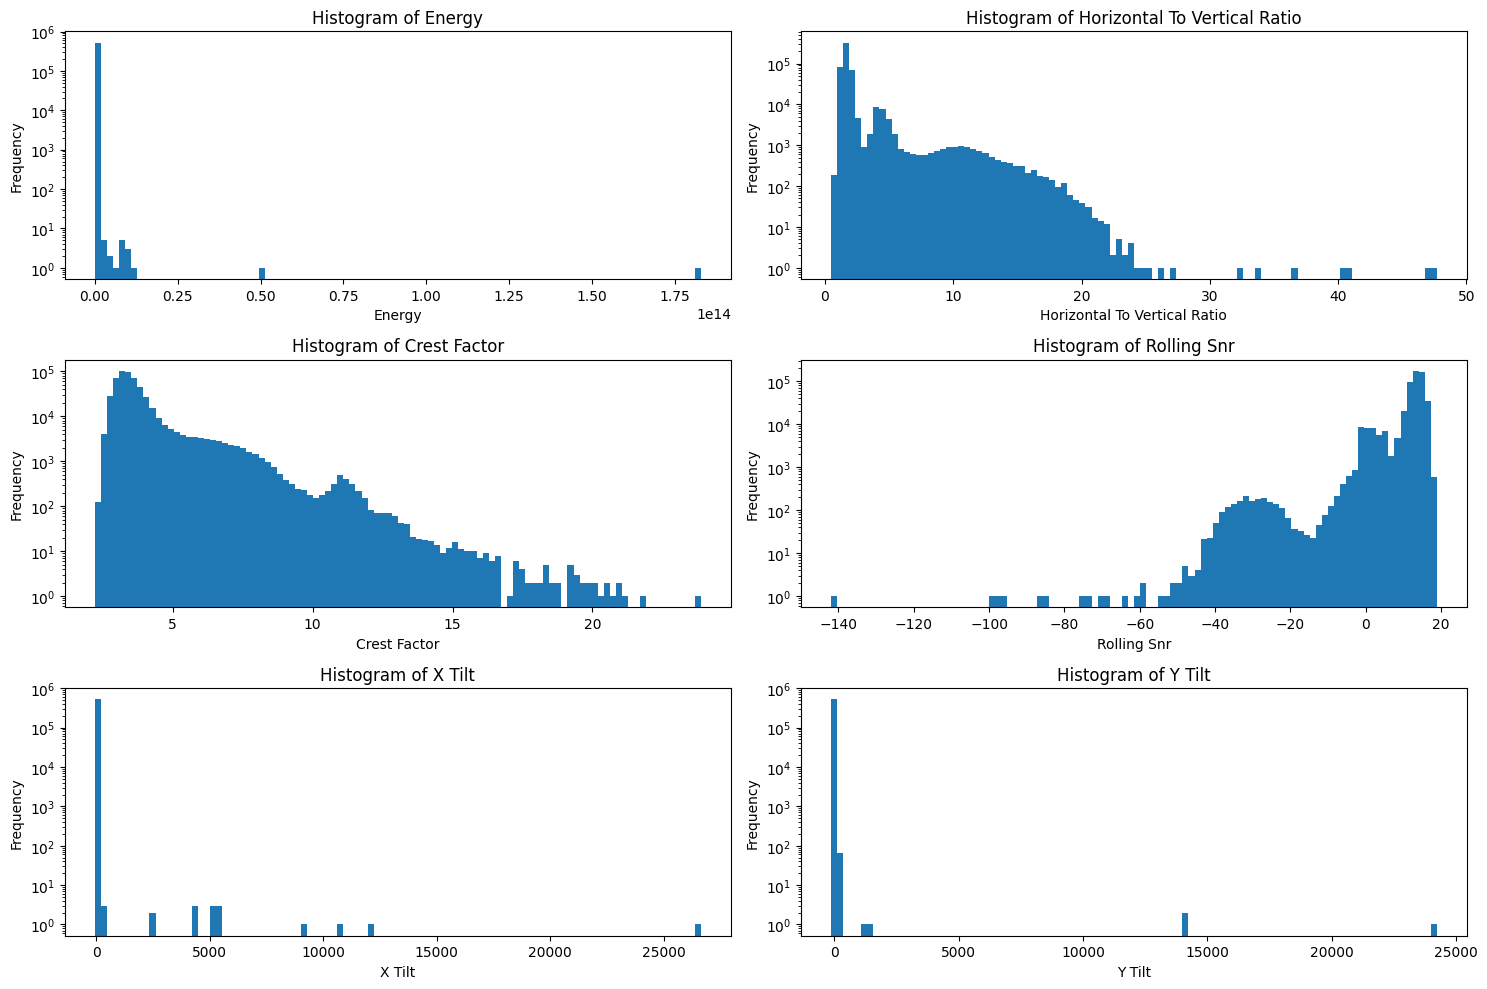

Matrice di correlazione:
                              crest_factor    energy  \
crest_factor                      1.000000  0.014609   
energy                            0.014609  1.000000   
horizontal_to_vertical_ratio      0.622179  0.001449   
max_amplitude                     0.123139  0.944241   
motion_direction                 -0.004304  0.000428   
peak_count                       -0.394703 -0.002090   
rms                               0.140036  0.831899   
rolling_snr                      -0.786703 -0.003273   
spectral_entropy                  0.745892  0.005566   
statistics_kurtosis               0.836496  0.027595   
statistics_skewness              -0.031784 -0.002752   
statistics_std_dev                0.140006  0.831917   
statistics_variance               0.014608  1.000000   
x_tilt                            0.009506 -0.000218   
y_tilt                            0.031491 -0.000212   

                              horizontal_to_vertical_ratio  max_amplitude  \
c

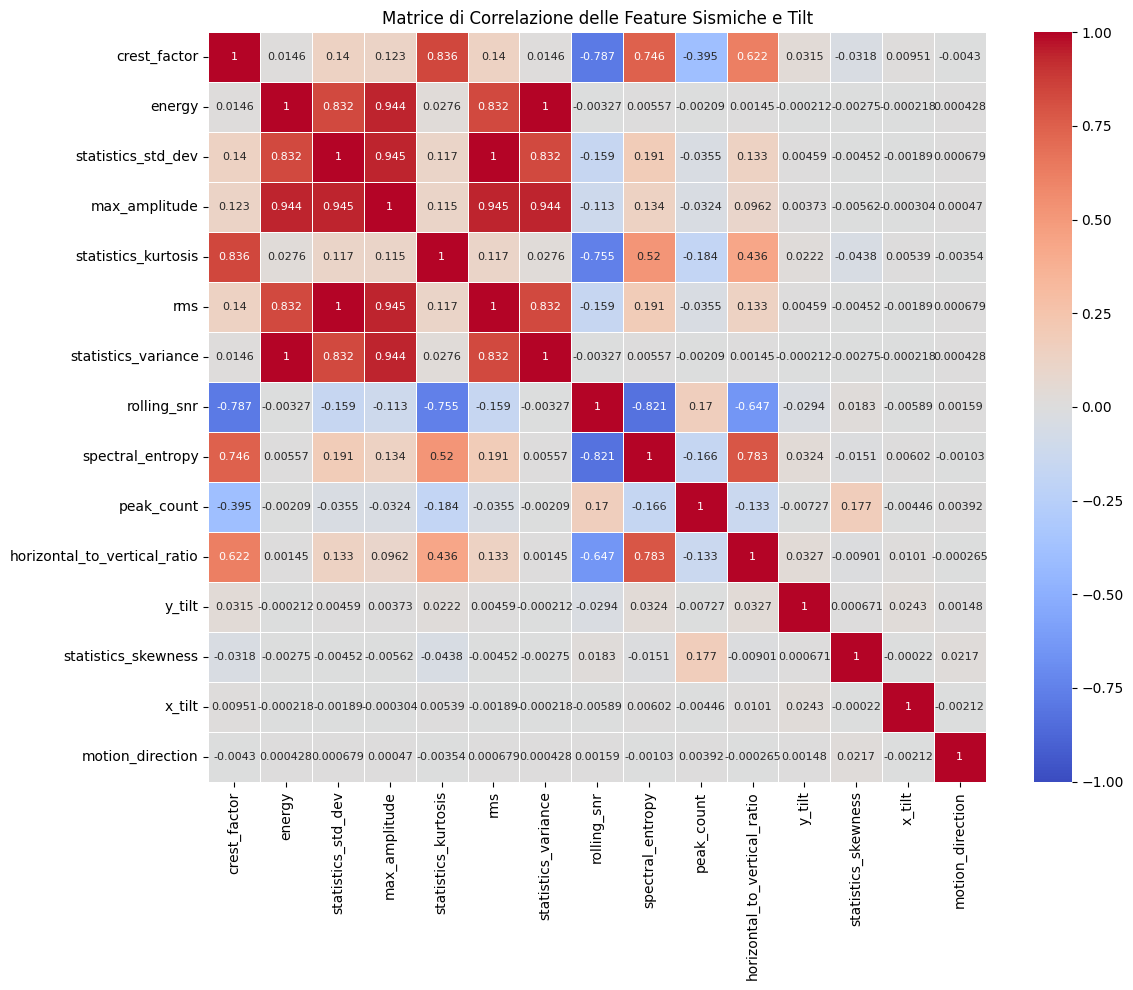

In [62]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Percorso base della cartella contenente i dati
base_path = "data/final"

# Cartelle contenenti i dati finali
seismic_path = os.path.join(base_path, "SEISMIC_final")
tilt_path = os.path.join(base_path, "TILT_final")

def load_all_features_from_directory(directory_path, file_suffix):
    all_features = []
    # Itera attraverso tutte le sottocartelle (una per ogni stazione)
    for station_folder in os.listdir(directory_path):
        station_path = os.path.join(directory_path, station_folder)
        if os.path.isdir(station_path):
            # Trova tutti i file .pkl che terminano con il suffisso specificato
            feature_files = glob.glob(os.path.join(station_path, f"*{file_suffix}.pkl"))
            for feature_file in feature_files:
                # Carica le feature e rinomina la colonna con il nome della feature
                feature_name = os.path.basename(feature_file).replace(file_suffix + ".pkl", "")
                df = pd.read_pickle(feature_file)
                if df.ndim == 1:
                    df = df.to_frame(name=feature_name)
                else:
                    df.columns = [f"{feature_name}_{col}" for col in df.columns]
                # Verifica se il DataFrame contiene dati
                if not df.empty:
                    all_features.append(df)
                else:
                    print(f"Attenzione: il file {feature_file} è vuoto e verrà ignorato.")
    # Concatena tutte le feature in un unico DataFrame
    if all_features:
        return pd.concat(all_features, axis=1)
    else:
        return pd.DataFrame()

# Carica tutte le feature sismiche
seismic_features = load_all_features_from_directory(seismic_path, "_imputed")
# Carica tutte le feature tilt
tilt_features = load_all_features_from_directory(tilt_path, "_Avg")

# Verifica se i dati caricati sono DataFrame, in caso contrario converte da Series
if isinstance(seismic_features, pd.Series):
    seismic_features = seismic_features.to_frame()
if isinstance(tilt_features, pd.Series):
    tilt_features = tilt_features.to_frame()

# Rimuovi eventuali colonne non numeriche
seismic_features = seismic_features.select_dtypes(include=['number'])
tilt_features = tilt_features.select_dtypes(include=['number'])

# Rimuovi eventuali colonne che contengono solo valori infiniti o NaN
seismic_features = seismic_features.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')
tilt_features = tilt_features.replace([np.inf, -np.inf], np.nan).dropna(axis=1, how='all')

# Rimuovi le colonne duplicate
seismic_features = seismic_features.loc[:, ~seismic_features.columns.duplicated()]
tilt_features = tilt_features.loc[:, ~tilt_features.columns.duplicated()]

# Calcola la media delle feature tilt per ogni asse ('tilt_x' e 'tilt_y') per avere una singola rappresentazione del tilt
x_tilt_features = tilt_features.filter(like='x_Avg').mean(axis=1, skipna=True)
y_tilt_features = tilt_features.filter(like='y_Avg').mean(axis=1, skipna=True)

tilt_features_mean = pd.DataFrame({'x_tilt': x_tilt_features, 'y_tilt': y_tilt_features})

# Converte gli indici delle feature sismiche e tilt in datetime per garantire l'allineamento
if seismic_features.index.dtype == 'int64':
    seismic_features.index = pd.to_datetime(seismic_features.index, unit='s').floor('min')
else:
    seismic_features.index = pd.to_datetime(seismic_features.index).floor('min')

if tilt_features_mean.index.dtype == 'int64':
    tilt_features_mean.index = pd.to_datetime(tilt_features_mean.index, unit='s').floor('min')
else:
    tilt_features_mean.index = pd.to_datetime(tilt_features_mean.index).floor('min')

# Se l'indice delle feature tilt è ancora sbagliato, impostalo manualmente
if tilt_features_mean.index.min().year == 1970:
    tilt_features_mean.index = pd.date_range(start='2021-01-01', periods=len(tilt_features_mean), freq='1min')

# Assicurati che gli indici delle feature tilt siano unici prima di reindicizzare
tilt_features_mean = tilt_features_mean[~tilt_features_mean.index.duplicated(keep='first')]
seismic_features = seismic_features[~seismic_features.index.duplicated(keep='first')]

# Uniforma la frequenza degli indici a 1 minuto
tilt_features_mean.index = pd.to_datetime(tilt_features_mean.index, errors='coerce')
tilt_features_mean = tilt_features_mean.dropna().asfreq('1min').interpolate(method='time')
seismic_features.index = pd.to_datetime(seismic_features.index, errors='coerce')
seismic_features = seismic_features.dropna().asfreq('1min').interpolate(method='time')


# Trova l'intervallo di tempo comune tra le feature sismiche e tilt
start_time = max(seismic_features.index.min(), tilt_features_mean.index.min())
end_time = min(seismic_features.index.max(), tilt_features_mean.index.max())

# Crea un indice comune basato sull'intervallo di tempo condiviso, solo se l'intervallo è valido
if pd.notna(start_time) and pd.notna(end_time) and start_time <= end_time:
    common_index = pd.date_range(start=start_time, end=end_time, freq='1min')

    # Reindicizza entrambe le serie di feature in base all'indice comune e interpola i valori mancanti
    seismic_features = seismic_features.reindex(common_index).interpolate(method='time')
    tilt_features_mean = tilt_features_mean.reindex(common_index).interpolate(method='time')

    # Calcolo delle statistiche di base
    basic_statistics = combined_features.describe()

    # Verifica se le feature principali esistono prima di creare gli istogrammi
    features_to_plot = ['energy', 'horizontal_to_vertical_ratio', 'crest_factor', 'rolling_snr', 'x_tilt', 'y_tilt']
    existing_features = [feature for feature in features_to_plot if feature in combined_features.columns]

    # Istogrammi delle feature principali
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(existing_features):
        plt.subplot(3, 2, i + 1)
        plt.hist(combined_features[feature].dropna(), bins=100, log=True)  # Aggiunto dropna() per evitare problemi con valori NaN
        plt.xlabel(feature.replace('_', ' ').title())
        plt.ylabel('Frequency')
        plt.title(f'Histogram of {feature.replace("_", " ").title()}')

    plt.tight_layout()
    plt.show()

    # Filtra solo le colonne numeriche
    numeric_features_df = combined_features.select_dtypes(include=[np.number])

    # Calcola la matrice di correlazione
    correlation_matrix = numeric_features_df.corr()
    print("Matrice di correlazione:")
    print(correlation_matrix)

    # Heatmap della matrice di correlazione con annotazioni
    plt.figure(figsize=(12, 10))
    sorted_corr = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
    sorted_features = sorted_corr.index.get_level_values(0).unique()
    sorted_correlation_matrix = correlation_matrix.loc[sorted_features, sorted_features]
    sns.heatmap(sorted_correlation_matrix, annot=True, fmt='.3g', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, annot_kws={'size': 8})
    plt.title("Matrice di Correlazione delle Feature Sismiche e Tilt")
    plt.tight_layout()
    plt.savefig("data/combined_correlation_matrix_plot.png")
    plt.show()
else:
    print("Errore: Nessun intervallo di tempo comune trovato tra le feature sismiche e tilt.")


Caricamento delle feature tilt:   0%|                                                            | 0/4 [00:00<?, ?it/s]

Informazioni sul file CBD_tilt_x_Avg.pkl per la stazione CBD_final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517164 entries, 0 to 517163
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   517164 non-null  object 
 1   tilt_x_Avg  517164 non-null  float64
 2   station     517164 non-null  object 
dtypes: float64(1), object(2)
memory usage: 11.8+ MB
None
             timestamp  tilt_x_Avg station
0  2021-01-01 00:00:00    94.02685     CBD
1  2021-01-01 00:01:00    94.02763     CBD
2  2021-01-01 00:02:00    94.00105     CBD
3  2021-01-01 00:03:00    94.02243     CBD
4  2021-01-01 00:04:00    94.00603     CBD
Informazioni sul file CBD_tilt_y_Avg.pkl per la stazione CBD_final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517164 entries, 0 to 517163
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   517164 non-null  

Caricamento delle feature tilt:  25%|█████████████                                       | 1/4 [00:00<00:01,  1.56it/s]

Informazioni sul file ECP_tilt_x_Avg.pkl per la stazione ECP_final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525660 entries, 0 to 525659
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   525660 non-null  object 
 1   tilt_x_Avg  525595 non-null  float64
 2   station     525660 non-null  object 
dtypes: float64(1), object(2)
memory usage: 12.0+ MB
None
             timestamp  tilt_x_Avg station
0  2021-01-01 00:00:00   -45.56833     ECP
1  2021-01-01 00:01:00   -45.56909     ECP
2  2021-01-01 00:02:00   -45.56809     ECP
3  2021-01-01 00:03:00   -45.56723     ECP
4  2021-01-01 00:04:00   -45.56616     ECP
Informazioni sul file ECP_tilt_y_Avg.pkl per la stazione ECP_final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525660 entries, 0 to 525659
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   525660 non-null  

Caricamento delle feature tilt:  50%|██████████████████████████                          | 2/4 [00:01<00:01,  1.64it/s]

Informazioni sul file PDN_tilt_x_Avg.pkl per la stazione PDN_final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525660 entries, 0 to 525659
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   525660 non-null  object 
 1   tilt_x_Avg  525595 non-null  float64
 2   station     525660 non-null  object 
dtypes: float64(1), object(2)
memory usage: 12.0+ MB
None
             timestamp  tilt_x_Avg station
0  2021-01-01 00:00:00    117.4440     PDN
1  2021-01-01 00:01:00    117.4459     PDN
2  2021-01-01 00:02:00    117.4447     PDN
3  2021-01-01 00:03:00    117.4468     PDN
4  2021-01-01 00:04:00    117.4455     PDN
Informazioni sul file PDN_tilt_y_Avg.pkl per la stazione PDN_final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525660 entries, 0 to 525659
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   525660 non-null  

Caricamento delle feature tilt:  75%|███████████████████████████████████████             | 3/4 [00:01<00:00,  1.66it/s]

Informazioni sul file PLC_tilt_x_Avg.pkl per la stazione PLC_final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525660 entries, 0 to 525659
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   525660 non-null  object 
 1   tilt_x_Avg  525595 non-null  float64
 2   station     525660 non-null  object 
dtypes: float64(1), object(2)
memory usage: 12.0+ MB
None
             timestamp  tilt_x_Avg station
0  2021-01-01 00:00:00   -243.9577     PLC
1  2021-01-01 00:01:00   -243.9575     PLC
2  2021-01-01 00:02:00   -243.9516     PLC
3  2021-01-01 00:03:00   -243.9509     PLC
4  2021-01-01 00:04:00   -243.9537     PLC
Informazioni sul file PLC_tilt_y_Avg.pkl per la stazione PLC_final:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525660 entries, 0 to 525659
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   525660 non-null  

Caricamento delle feature tilt: 100%|████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.65it/s]


Informazioni dettagliate sui dati tilt:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525600 entries, 2021-01-01 00:00:00 to 2021-12-31 23:59:00
Freq: min
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CBD_tilt_x_CBD_final  517132 non-null  float64
 1   CBD_tilt_y_CBD_final  517132 non-null  float64
 2   ECP_tilt_x_ECP_final  525535 non-null  float64
 3   ECP_tilt_y_ECP_final  525535 non-null  float64
 4   PDN_tilt_x_PDN_final  525535 non-null  float64
 5   PDN_tilt_y_PDN_final  525535 non-null  float64
 6   PLC_tilt_x_PLC_final  525535 non-null  float64
 7   PLC_tilt_y_PLC_final  525535 non-null  float64
dtypes: float64(8)
memory usage: 36.1 MB
None
Prime righe delle feature tilt:
                     CBD_tilt_x_CBD_final  CBD_tilt_y_CBD_final  \
timestamp                                                         
2021-01-01 00:00:00              94.02685              240.9929   
2021-01

Aggiunta indicatori di eventi parossistici: 100%|█████████████████████████████████████| 60/60 [00:00<00:00, 418.53it/s]


Prime righe delle feature combinate:
                     crest_factor_AIO_final  energy_AIO_final  \
2021-01-01 00:00:00                3.119954      3.527347e+07   
2021-01-01 00:01:00                2.976462      2.809140e+07   
2021-01-01 00:02:00                3.811623      3.527995e+07   
2021-01-01 00:03:00                3.487202      4.122865e+07   
2021-01-01 00:04:00                2.773371      4.019767e+07   

                     horizontal_to_vertical_ratio_AIO_final  \
2021-01-01 00:00:00                                1.724314   
2021-01-01 00:01:00                                1.773568   
2021-01-01 00:02:00                                1.810077   
2021-01-01 00:03:00                                1.617295   
2021-01-01 00:04:00                                1.540488   

                     max_amplitude_AIO_final  motion_direction_AIO_final  \
2021-01-01 00:00:00               239.219514                   -2.697843   
2021-01-01 00:01:00               203.662

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed: 16.8min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

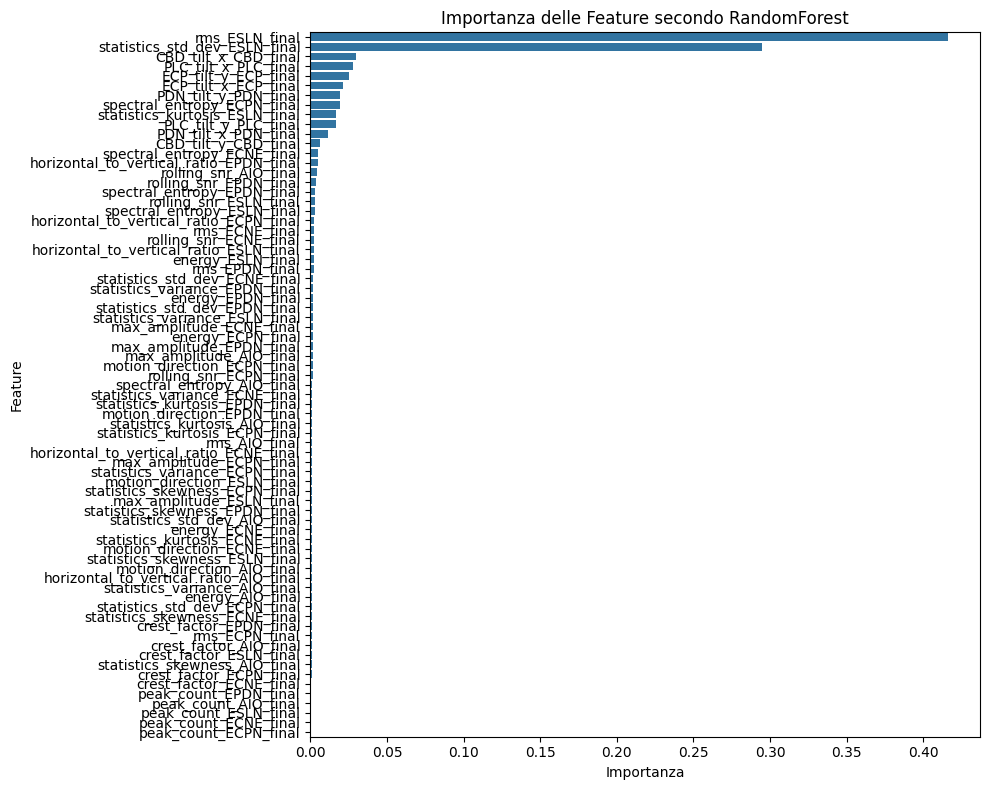

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from tqdm import tqdm

# Carica i dataset delle feature sismiche e tilt
dataset_dir = 'data/final'

# Carica le feature sismiche
seismic_features = []
seismic_stations = ['AIO_final', 'ECNE_final', 'ECPN_final', 'EPDN_final', 'ESLN_final']
seismic_features_files = [
    'crest_factor_imputed.pkl', 'energy_imputed.pkl', 'horizontal_to_vertical_ratio_imputed.pkl',
    'max_amplitude_imputed.pkl', 'motion_direction_imputed.pkl', 'peak_count_imputed.pkl',
    'rms_imputed.pkl', 'rolling_snr_imputed.pkl', 'spectral_entropy_imputed.pkl',
    'statistics_kurtosis_imputed.pkl', 'statistics_skewness_imputed.pkl', 'statistics_std_dev_imputed.pkl',
    'statistics_variance_imputed.pkl'
]

for station in tqdm(seismic_stations, desc="Caricamento delle feature sismiche"):
    station_features = []
    for feature_file in seismic_features_files:
        feature_path = os.path.join(dataset_dir, 'SEISMIC_final', station, feature_file)
        if os.path.exists(feature_path):
            feature_df = pd.read_pickle(feature_path)
            # Controlla se è una Series e converti in DataFrame
            if isinstance(feature_df, pd.Series):
                feature_df = feature_df.to_frame()
            feature_df.columns = [f"{feature_file.split('_imputed.pkl')[0]}_{station}" for _ in feature_df.columns]  # Aggiungi il nome della feature con stazione
            station_features.append(feature_df)
    if station_features:
        seismic_features.append(pd.concat(station_features, axis=1))

# Concatena tutte le feature sismiche
if seismic_features:
    seismic_features_df = pd.concat(seismic_features, axis=1)
else:
    seismic_features_df = pd.DataFrame()

# Carica le feature tilt
tilt_features = []
tilt_stations = ['CBD_final', 'ECP_final', 'PDN_final', 'PLC_final']
tilt_features_files = ['CBD_tilt_x_Avg.pkl', 'CBD_tilt_y_Avg.pkl', 'ECP_tilt_x_Avg.pkl', 'ECP_tilt_y_Avg.pkl', 'PDN_tilt_x_Avg.pkl', 'PDN_tilt_y_Avg.pkl', 'PLC_tilt_x_Avg.pkl', 'PLC_tilt_y_Avg.pkl']

for station in tqdm(tilt_stations, desc="Caricamento delle feature tilt"):
    station_features = []
    for feature_file in tilt_features_files:
        feature_path = os.path.join(dataset_dir, 'TILT_final', station, feature_file)
        if os.path.exists(feature_path):
            feature_df = pd.read_pickle(feature_path)
            # Debug: Controlla il contenuto del file caricato
            print(f"Informazioni sul file {feature_file} per la stazione {station}:")
            print(feature_df.info())
            print(feature_df.head())
            # Controlla se è una Series e converti in DataFrame
            if isinstance(feature_df, pd.Series):
                feature_df = feature_df.to_frame()
            # Rimuovi eventuali colonne di stazione
            if 'station' in feature_df.columns:
                feature_df = feature_df.drop(columns=['station'])
            # Assumi che la prima colonna sia il timestamp e rinominala correttamente
            feature_df['timestamp'] = pd.to_datetime(feature_df['timestamp'])
            feature_df.set_index('timestamp', inplace=True)
            feature_df.columns = [f"{feature_file.split('_Avg.pkl')[0]}_{station}" for _ in feature_df.columns]  # Aggiungi il nome della feature con stazione
            feature_df = feature_df[~feature_df.index.duplicated(keep='first')]  # Rimuovi eventuali duplicati
            station_features.append(feature_df)
    if station_features:
        tilt_features.append(pd.concat(station_features, axis=1, join='outer', sort=False))

# Concatena tutte le feature tilt
if tilt_features:
    tilt_features_df = pd.concat(tilt_features, axis=1, join='outer', sort=False)
else:
    tilt_features_df = pd.DataFrame()

# Debug: Controllo dettagliato sui dati tilt
print("Informazioni dettagliate sui dati tilt:")
print(tilt_features_df.info())
print("Prime righe delle feature tilt:")
print(tilt_features_df.head())
print("Controllo indici duplicati nelle feature tilt:")
print(tilt_features_df.index[tilt_features_df.index.duplicated(keep=False)])

# Rendi unici gli indici di tilt_features_df
if not tilt_features_df.index.is_unique:
    tilt_features_df = tilt_features_df.loc[~tilt_features_df.index.duplicated(keep='first')]

# Debug: Stampa le prime righe delle feature tilt dopo la rimozione dei duplicati
print("Prime righe delle feature tilt dopo la rimozione dei duplicati:")
print(tilt_features_df.head())

# Allinea i timestamp delle feature tilt con quelli delle feature sismiche
if not tilt_features_df.empty and not seismic_features_df.empty:
    common_index = seismic_features_df.index.intersection(tilt_features_df.index)
    seismic_features_df = seismic_features_df.loc[common_index]
    tilt_features_df = tilt_features_df.loc[common_index]

# Assicurati che gli indici siano ordinati
seismic_features_df.sort_index(inplace=True)
tilt_features_df.sort_index(inplace=True)

# Combina le feature sismiche e tilt
combined_features = pd.concat([seismic_features_df, tilt_features_df], axis=1, join='outer', sort=False)

# Carica il dataset degli eventi parossistici
events_df = pd.read_csv('data/csv_eruzioni/etichette_2021.csv', parse_dates=['start_time', 'end_time'])

# Aggiungi un indicatore di evento parossistico
combined_features['timestamp'] = combined_features.index  # Assumi che l'indice sia un DatetimeIndex
combined_features['paroxysmal_event'] = 0

for _, row in tqdm(events_df.iterrows(), desc="Aggiunta indicatori di eventi parossistici", total=len(events_df)):
    mask = (combined_features['timestamp'] >= row['start_time']) & (combined_features['timestamp'] <= row['end_time'])
    combined_features.loc[mask, 'paroxysmal_event'] = 1

# Filtra solo le colonne numeriche
numeric_features_df = combined_features.select_dtypes(include=['number'])

# Debug: Stampa le prime righe delle feature combinate
print("Prime righe delle feature combinate:")
print(numeric_features_df.head())

# Analisi dell'importanza delle feature con RandomForest
numeric_features_df = numeric_features_df.dropna()
features = numeric_features_df.drop(columns=['paroxysmal_event'])
target = numeric_features_df['paroxysmal_event']

# Verifica se le feature sono vuote
if features.shape[0] == 0:
    raise ValueError("Errore: Le feature sono vuote dopo la concatenazione. Controllare i passaggi precedenti per verificare eventuali problemi.")

scaled_features = StandardScaler().fit_transform(features)

rf = RandomForestRegressor(n_estimators=100, random_state=42, verbose=2)
rf.fit(scaled_features, target)

feature_importances = pd.Series(rf.feature_importances_, index=features.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Visualizzazione dell'importanza delle feature
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.title('Importanza delle Feature secondo RandomForest')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

# Salva i risultati in un file CSV
feature_importances.to_csv('feature_importances.csv', header=True)
